In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 그래프 가시화

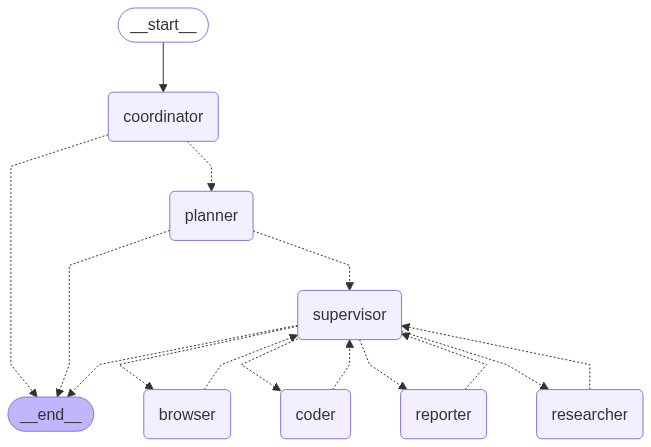

In [12]:
from src.graph import build_graph
graph = build_graph()

from IPython.display import Image, display

try:
    display(
        Image(graph.get_graph(xray=True).draw_mermaid_png())
    )  # 실행 가능한 객체의 그래프를 mermaid 형식의 PNG로 그려서 표시합니다. 
       # xray=True는 추가적인 세부 정보를 포함합니다.
except Exception as e:
    print(f"그래프 생성 중 오류가 발생했습니다: {str(e)}")
    print(f"오류 유형: {type(e).__name__}")

### 그래프 실행

In [13]:
import sys
from src.workflow import run_agent_workflow

In [14]:
# user_query = '''
#     I would like to analyze Amazon product sales data.
#     The target for analysis is the 'Amazon-Sale-Report-1st-Week-June-2022.csv' file.
#     Please conduct an analysis to extract marketing insights based on this data.
#     Please perform various analytical techniques starting from basic data attribute exploration, product sales trends, variable relationships, variable combinations, etc.
#     If there are any additional analyses needed to extract insights after the data analysis, please perform those as well.
#     Please include detailed analysis in the report along with supporting images and charts.
#     Please save the final report in PDF format.
# '''

user_query = '''
    이것은 아마존 상품판매 데이터를 분석하고 싶습니다.
    분석대상은 './data/Amazon-Sale-Report-1st-Week-June-2022.csv' 파일 입니다.
    데이터를 기반으로 마케팅 인사이트 추출을 위한 분석을 진행해 주세요.
    데이터 분석 후 상품 판매 트렌드 및 인사이트 추출에 필요한 사항이 있다면 그를 위한 추가 분석도 수행해 주세요.
    분석 리포트는 상세 분석과 그 것을 뒷받침 할 수 있는 이미지 및 차트를 함께 삽입해 주세요.
    최종 리포트는 pdf 형태로 저장해 주세요.
'''
# user_query = '''
#     이것은 아마존 상품판매 데이터를 분석하고 싶습니다.
#     분석대상은 './data/Amazon-Sale-Report-1st-Week-June-2022.csv' 파일 입니다.
#     데이터를 기반으로 마케팅 인사이트 추출을 위한 분석을 진행해 주세요.
#     분석은 기본적인 데이터 속성 탐색 부터, 상품 판매 트렌드, 변수 관계, 변수 조합 등 다양한 분석 기법을 수행해 주세요.
#     데이터 분석 후 인사이트 추출에 필요한 사항이 있다면 그를 위한 추가 분석도 수행해 주세요.
#     분석 리포트는 상세 분석과 그 것을 뒷받침 할 수 있는 이미지 및 차트를 함께 삽입해 주세요.
#     최종 리포트는 pdf 형태로 저장해 주세요.
# '''

In [15]:
%%time

import os
import shutil

def remove_artifact_folder(folder_path="./artifacts/"):
    """
    ./artifact/ 폴더가 존재하면 삭제하는 함수
    
    Args:
        folder_path (str): 삭제할 폴더 경로
    """
    if os.path.exists(folder_path):
        print(f"'{folder_path}' 폴더를 삭제합니다...")
        try:
            # 폴더와 그 내용을 모두 삭제
            shutil.rmtree(folder_path)
            print(f"'{folder_path}' 폴더가 성공적으로 삭제되었습니다.")
        except Exception as e:
            print(f"오류 발생: {e}")
    else:
        print(f"'{folder_path}' 폴더가 존재하지 않습니다.")


#import nest_asyncio
#nest_asyncio.apply()

remove_artifact_folder()

result = run_agent_workflow(
    user_input=user_query,
    debug=False
)

# Print the conversation history
print("\n=== Conversation History ===")
print ("result", result)
for history in result["history"]:

    print ("===")
    print (f'agent: {history["agent"]}')
    print (f'message: {history["message"]}')


INFO [src.workflow] ===== Starting workflow =====

INFO [src.workflow] 
user input: 
    이것은 아마존 상품판매 데이터를 분석하고 싶습니다.
    분석대상은 './data/Amazon-Sale-Report-1st-Week-June-2022.csv' 파일 입니다.
    데이터를 기반으로 마케팅 인사이트 추출을 위한 분석을 진행해 주세요.
    분석은 기본적인 데이터 속성 탐색 부터, 상품 판매 트렌드, 변수 관계, 변수 조합 등 다양한 분석 기법을 수행해 주세요.
    데이터 분석 후 인사이트 추출에 필요한 사항이 있다면 그를 위한 추가 분석도 수행해 주세요.
    분석 리포트는 상세 분석과 그 것을 뒷받침 할 수 있는 이미지 및 차트를 함께 삽입해 주세요.
    최종 리포트는 pdf 형태로 저장해 주세요.



'./artifacts/' 폴더를 삭제합니다...
'./artifacts/' 폴더가 성공적으로 삭제되었습니다.



INFO [src.graph.nodes] ===== Coordinator talking...... =====

DEBUG [src.graph.nodes] Coordinator - Prompt Cache Disabled


## Langfuse 인증 테스트: True
INFO     [botocore.credentials] Found credentials in shared credentials file: ~/.aws/credentials
boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-east-1.amazonaws.com)
### stream:  False



DEBUG [src.graph.nodes] 
Current state messages:
[ { 'content': [ { 'text': '\n'
                           'Here is a user request: <user_request>\n'
                           '    이것은 아마존 상품판매 데이터를 분석하고 싶습니다.\n'
                           "    분석대상은 './data/Amazon-Sale-Report-1st-Week-June-2022.csv' 파일 입니다.\n"
                           '    데이터를 기반으로 마케팅 인사이트 추출을 위한 분석을 진행해 주세요.\n'
                           '    분석은 기본적인 데이터 속성 탐색 부터, 상품 판매 트렌드, 변수 관계, 변수 조합 등 다양한 분석 기법을 수행해 '
                           '주세요.\n'
                           '    데이터 분석 후 인사이트 추출에 필요한 사항이 있다면 그를 위한 추가 분석도 수행해 주세요.\n'
                           '    분석 리포트는 상세 분석과 그 것을 뒷받침 할 수 있는 이미지 및 차트를 함께 삽입해 주세요.\n'
                           '    최종 리포트는 pdf 형태로 저장해 주세요.\n'
                           '</user_request>\n'}],
    'role': 'user'}]

DEBUG [src.graph.nodes] 
Coordinator response:
{ 'latency': None,
  'reasoning': '',
  'signature': '',
  'stop_reason': 'end_turn',
  'text': 'handoff_to_planner: 이 요청은

## response: 
 {
  "text": "handoff_to_planner: 이 요청은 복잡한 데이터 분석 작업을 요구하므로, 저희 계획 시스템에 전달하여 적절한 처리를 받을 것입니다. 계획 팀에서 곧 연락드리겠습니다.",
  "reasoning": "",
  "signature": "",
  "toolUse": null,
  "token_usage": {
    "inputTokens": 642,
    "outputTokens": 112,
    "totalTokens": 754
  },
  "latency": null,
  "stop_reason": "end_turn"
}
INFO     [botocore.credentials] Found credentials in shared credentials file: ~/.aws/credentials
boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-east-1.amazonaws.com)
INFO     [botocore.credentials] Found credentials in shared credentials file: ~/.aws/credentials
boto3 Bedrock client successfully created!
bedrock-runtime(https://bedrock-runtime.us-east-1.amazonaws.com)
### stream:  True
Let me analyze the user request carefully:

1. The user wants to analyze Amazon sales data
2. The data is in a file called './data/Amazon-Sale-Report-1st-Week-June-2022.csv'
3. They want marketing insights from this data
4. The analysis sho


DEBUG [src.graph.nodes] 
Planner response:
('# Plan\n'
 '\n'
 '## thought\n'
 '이 요청은 아마존 판매 데이터 분석을 위한 것입니다. 사용자가 원하는 분석은 기본 데이터 탐색부터 판매 트렌드, 변수 관계 분석까지 포함하며 최종 결과물은 시각화 자료가 '
 '포함된 PDF 형태의 보고서입니다. 이를 위해 코더와 리포터를 효율적으로 활용한 계획을 세웁니다.\n'
 '\n'
 '## title:\n'
 '아마존 판매 데이터 분석 및 마케팅 인사이트 추출\n'
 '\n'
 '## steps:\n'
 '\n'
 '### 1. Coder: 아마존 판매 데이터 분석 및 시각화\n'
 "- [ ] 'Amazon-Sale-Report-1st-Week-June-2022.csv' 파일 불러오기 및 기본 구조 파악\n"
 '- [ ] 데이터 정제 및 전처리 (결측치, 이상치 처리)\n'
 '- [ ] 기본 통계 분석 수행 (요약 통계, 분포 확인)\n'
 '- [ ] 판매 트렌드 분석 (시간별, 카테고리별, 지역별 판매 분석)\n'
 '- [ ] 변수 간 상관관계 분석 및 시각화\n'
 '- [ ] 수익성 분석 (고수익/저수익 상품군 파악)\n'
 '- [ ] 고객 행동 패턴 분석 (구매 빈도, 금액 등)\n'
 '- [ ] 다양한 시각화 차트 생성 (막대 그래프, 선 그래프, 히트맵, 산점도 등)\n'
 '- [ ] 분석 결과와 관련 인사이트 도출\n'
 '- [ ] 모든 시각화 자료를 보고서용 이미지 파일로 저장\n'
 '\n'
 '### 2. Reporter: 종합 분석 보고서 작성 및 PDF 생성\n'
 '- [ ] 분석 결과와 시각화 자료를 통합한 체계적인 보고서 구성\n'
 '- [ ] 도입부 및 데이터셋 개요 작성\n'
 '- [ ] 각 분석 결과에 대한 상세 설명 및 인사이트 정리\n'
 '- [ ] 마케팅 측면에서의 핵심 인사이트 및 제안 사항 작성\n'
 '- [ ] 시각적 자료와 설명을 효과적으로 통


Stop reason: end_turn
Latency: 25803 milliseconds
## response: 
 {
  "text": "# Plan\n\n## thought\n이 요청은 아마존 판매 데이터 분석을 위한 것입니다. 사용자가 원하는 분석은 기본 데이터 탐색부터 판매 트렌드, 변수 관계 분석까지 포함하며 최종 결과물은 시각화 자료가 포함된 PDF 형태의 보고서입니다. 이를 위해 코더와 리포터를 효율적으로 활용한 계획을 세웁니다.\n\n## title:\n아마존 판매 데이터 분석 및 마케팅 인사이트 추출\n\n## steps:\n\n### 1. Coder: 아마존 판매 데이터 분석 및 시각화\n- [ ] 'Amazon-Sale-Report-1st-Week-June-2022.csv' 파일 불러오기 및 기본 구조 파악\n- [ ] 데이터 정제 및 전처리 (결측치, 이상치 처리)\n- [ ] 기본 통계 분석 수행 (요약 통계, 분포 확인)\n- [ ] 판매 트렌드 분석 (시간별, 카테고리별, 지역별 판매 분석)\n- [ ] 변수 간 상관관계 분석 및 시각화\n- [ ] 수익성 분석 (고수익/저수익 상품군 파악)\n- [ ] 고객 행동 패턴 분석 (구매 빈도, 금액 등)\n- [ ] 다양한 시각화 차트 생성 (막대 그래프, 선 그래프, 히트맵, 산점도 등)\n- [ ] 분석 결과와 관련 인사이트 도출\n- [ ] 모든 시각화 자료를 보고서용 이미지 파일로 저장\n\n### 2. Reporter: 종합 분석 보고서 작성 및 PDF 생성\n- [ ] 분석 결과와 시각화 자료를 통합한 체계적인 보고서 구성\n- [ ] 도입부 및 데이터셋 개요 작성\n- [ ] 각 분석 결과에 대한 상세 설명 및 인사이트 정리\n- [ ] 마케팅 측면에서의 핵심 인사이트 및 제안 사항 작성\n- [ ] 시각적 자료와 설명을 효과적으로 통합\n- [ ] 결론 및 향후 분석 방향 제시\n- [ ] 완성된 보고서를 PDF 형식으로 저장",
  "reasoning": "Let me 


DEBUG [src.graph.nodes] 
Supervisor - current state messages:
[ { 'content': [ { 'text': '# Plan\n'
                           '\n'
                           '## thought\n'
                           '이 요청은 아마존 판매 데이터 분석을 위한 것입니다. 사용자가 원하는 분석은 기본 데이터 탐색부터 판매 트렌드, 변수 관계 '
                           '분석까지 포함하며 최종 결과물은 시각화 자료가 포함된 PDF 형태의 보고서입니다. 이를 위해 코더와 리포터를 효율적으로 활용한 '
                           '계획을 세웁니다.\n'
                           '\n'
                           '## title:\n'
                           '아마존 판매 데이터 분석 및 마케팅 인사이트 추출\n'
                           '\n'
                           '## steps:\n'
                           '\n'
                           '### 1. Coder: 아마존 판매 데이터 분석 및 시각화\n'
                           "- [ ] 'Amazon-Sale-Report-1st-Week-June-2022.csv' 파일 불러오기 및 기본 구조 파악\n"
                           '- [ ] 데이터 정제 및 전처리 (결측치, 이상치 처리)\n'
                           '- [ ] 기본 통계 분석 수행 (요약 통계, 분포 확인)\n'
                           '- [ ] 판매 트렌드 분석 (시간별, 카테고리


Stop reason: end_turn
Latency: 2059 milliseconds
## response: 
 {
  "text": "{\"next\": \"coder\"}",
  "reasoning": "",
  "signature": "",
  "toolUse": null,
  "token_usage": {
    "inputTokens": 2069,
    "outputTokens": 10,
    "totalTokens": 2079
  },
  "latency": 2059,
  "stop_reason": "end_turn"
}


GraphRecursionError: Recursion limit of 3 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT